**Memanggil Library Yang Digunakan**

In [69]:
from googleapiclient.discovery import build
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Konfigurasi API Serta Channel YouTube**

In [70]:
API_KEY = "#"
CHANNEL_ID = "UCJLVa5D8lAep2HqJNDl__NQ" #Ini Channel ID Erix Soekamti
youtube = build('youtube', 'v3', developerKey=API_KEY)

**Fungsi Untuk Mendapatkan Statistik Channel**

In [71]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    
    return response['items']

In [72]:
def get_video_list(youtube, upload_id):
    video_list = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=upload_id,
        maxResults=50
    )
    next_page = True
    while next_page:
        response = request.execute()
        data = response['items']

        for video in data:
            video_id = video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)

        # Do we have more pages?
        if 'nextPageToken' in response.keys():
            next_page = True
            request = youtube.playlistItems().list(
                part="snippet,contentDetails",
                playlistId=upload_id,
                pageToken=response['nextPageToken'],
                maxResults=50
            )
        else:
            next_page = False

    return video_list

In [73]:
def get_video_details(youtube, video_list):
    stats_list=[]

    
    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            description=video['snippet']['description']
            #tag_count= len(video['snippet']['tags'])
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            dislike_count=video['statistics'].get('dislikeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict=dict(title=title, description=description, published=published, view_count=view_count, like_count=like_count, dislike_count=dislike_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [74]:
channel_stats = get_channel_stats(youtube, CHANNEL_ID)


In [75]:
upload_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
upload_id

'UUJLVa5D8lAep2HqJNDl__NQ'

In [76]:
video_list = get_video_list(youtube, upload_id)

In [77]:
video_data = get_video_details(youtube, video_list)

**Melihat Sampel Data Kemudian Disimpan Dalam CSV**

In [78]:
df=pd.DataFrame(video_data)
df['title_length'] = df['title'].str.len()
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["dislike_count"] = pd.to_numeric(df["dislike_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
# reaction used later add up likes + dislikes + comments
df["reactions"] = df["like_count"] + df["dislike_count"] + df["comment_count"] + df["comment_count"]
df.to_csv("ErixS-Data.csv")
df.head(25)

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions
0,SUDAH GAK ADA AHMAD DHANI DI EPISODE KALI INI ...,SUDAH GAK ADA AHMAD DHANI DI EPISODE KALI INI ...,2021-09-02T04:36:39Z,39718,952,10,133,59,1228
1,KEGAGALAN DEWA 19 MENURUT AHMAD DHANI #DOES ep...,KEGAGALAN DEWA 19 MENURUT AHMAD DHANI #DOES ep...,2021-08-30T23:30:00Z,98710,3103,44,395,51,3937
2,ROOM TOUR VILLA AHMAD DHANI #DOES eps 936,ROOM TOUR VILLA AHMAD DHANI #DOES eps 936\nSoe...,2021-08-28T13:34:40Z,131681,2644,57,273,41,3247
3,UJI NYALI DI VILLA MATARAM AHMAD DHANI #DOES e...,UJI NYALI DI VILLA MATARAM AHMAD DHANI #DOES e...,2021-08-27T12:08:29Z,262083,3728,107,494,52,4823
4,DIJEMPUT PAKSA AHMAD DHANI #DOES eps 934,DIJEMPUT PAKSA AHMAD DHANI #DOES eps 934\n\nPe...,2021-08-23T00:00:10Z,167840,2314,72,161,40,2708
5,SUDAH GAK PERAWAN #DOES eps 933,SUDAH GAK PERAWAN #DOES eps 933\n\nErix Soekam...,2021-08-20T07:37:18Z,26598,644,7,126,31,903
6,AHMAD DHANI KW LOR SAMBI #DOES eps 932,AHMAD DHANI KW LOR SAMBI #DOES eps 932\n\nErix...,2021-08-19T00:00:12Z,34727,538,5,45,38,633
7,TERGELINCIR JURANG 100 METER! #DOES eps 931,TERGELINCIR JURANG 100 METER! #DOES eps 931\n\...,2021-08-17T11:55:35Z,34005,774,9,109,43,1001
8,DISKRIMINASI BINATANG #DOES eps 930,DISKRIMINASI BINATANG #DOES eps 930\n\nErix So...,2021-08-16T00:00:56Z,23808,519,6,110,35,745
9,WALI KOTA SEMARANG KEGEP! #DOES eps 929,WALI KOTA SEMARANG KEGEP! #DOES eps 929\n\nEri...,2021-08-14T23:30:11Z,24436,612,7,35,39,689


In [79]:
print(df)

                                                  title  ... reactions
0     SUDAH GAK ADA AHMAD DHANI DI EPISODE KALI INI ...  ...      1228
1     KEGAGALAN DEWA 19 MENURUT AHMAD DHANI #DOES ep...  ...      3937
2             ROOM TOUR VILLA AHMAD DHANI #DOES eps 936  ...      3247
3     UJI NYALI DI VILLA MATARAM AHMAD DHANI #DOES e...  ...      4823
4              DIJEMPUT PAKSA AHMAD DHANI #DOES eps 934  ...      2708
...                                                 ...  ...       ...
1157  Endank Soekamti " NARCOBRA " ( anak band anti ...  ...       576
1158                  profesor GodBlessYou menolak bala  ...        24
1159                Soekamti Competition #2 edisi PANCO  ...        61
1160                               Soekamti Competition  ...       142
1161                                               Test  ...       112

[1162 rows x 9 columns]


**Menampilkan Grafik Banyaknya Video Berdasarkan Panjang Judul**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Banyaknya Video'), Text(0.5, 0, 'Panjang Judul')]

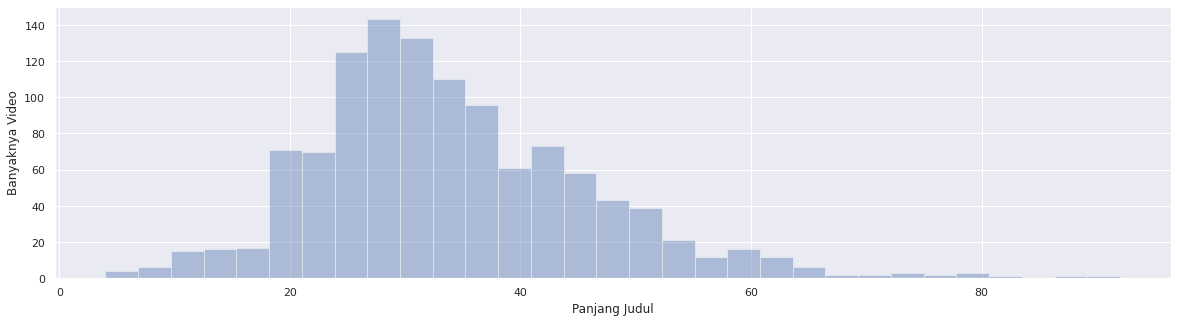

In [80]:
chart = sns.distplot( a=df["title_length"], hist=True, kde=False, rug=False )
chart.set(xlabel='Panjang Judul', ylabel='Banyaknya Video')

**Menampilkan Grafik Video Yang Paling Banyak Dilihat**

In [81]:
df_highest_views = df.nlargest(10, 'view_count')
df_highest_views['title'] = df_highest_views['title'].str[:40]
df_highest_views['view_count_millions'] = df_highest_views['view_count'] / 1000000
df_highest_views

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions,view_count_millions
1112,The Rain feat Endank Soekamti - Terlatih,Music Video of The Rain feat Endank Soekamti ‘...,2013-12-04T13:15:59Z,34202358,129713,3439,7785,65,148722,34.202358
260,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN #DOES ...,2018-12-30T18:47:34Z,3801549,34239,2393,1824,53,40280,3.801549
1055,Cherrybelle - Malam Minggu (Director's C,Music Video of Cherrybelle ‘Malam Minggu’.\nSu...,2015-07-20T20:09:30Z,1646040,29190,522,2210,43,34132,1.646040
298,PIJAT PLUS PLUS #DOES eps 697,PIJAT PLUS PLUS #DOES (eps 697)\n\nSubscribe t...,2018-09-23T03:13:12Z,1440078,1789,652,204,29,2849,1.440078
133,IWAN FALS TELAH BERUBAH #DOES eps 806,Erix Soekamti is a bassist of an Indonesian ro...,2020-03-25T07:40:52Z,1132467,16158,572,1539,37,19808,1.132467
308,SEKSI #DOES eps 687,SEKSI #DOES (eps 687)\n\nSubscribe to Erix So...,2018-08-19T03:45:54Z,949521,2096,520,167,19,2950,0.949521
776,Erix Soekamti: VIDEO UNTUK ARI SOEKAMTI,Diary of Erix Soekamti ‘VIDEO UNTUK ARI SOEKAM...,2016-06-23T20:53:57Z,800159,11880,230,2155,56,16420,0.800159
271,OM BAGUS NTRL NGAMUK BATAL KONSER #DOES,OM BAGUS NTRL NGAMUK BATAL KONSER #DOES (eps 7...,2018-11-24T12:27:07Z,761982,5187,379,389,47,6344,0.761982
807,Erix Soekamti: MATA NAJWA RUSUH? (#DOES,Diary of Erix Soekamti ‘MATA NAJWA RUSUH? (#DO...,2016-05-14T17:23:18Z,690502,6466,230,1125,49,8946,0.690502
963,Erix Soekamti: SHEILA ON 7 #DOES eps 90,Erix Soekamti: SHEILA ON 7 #DOES (eps 90)\n\nS...,2015-11-14T09:03:36Z,634790,6059,144,550,39,7303,0.634790


(0.0, 35.0)

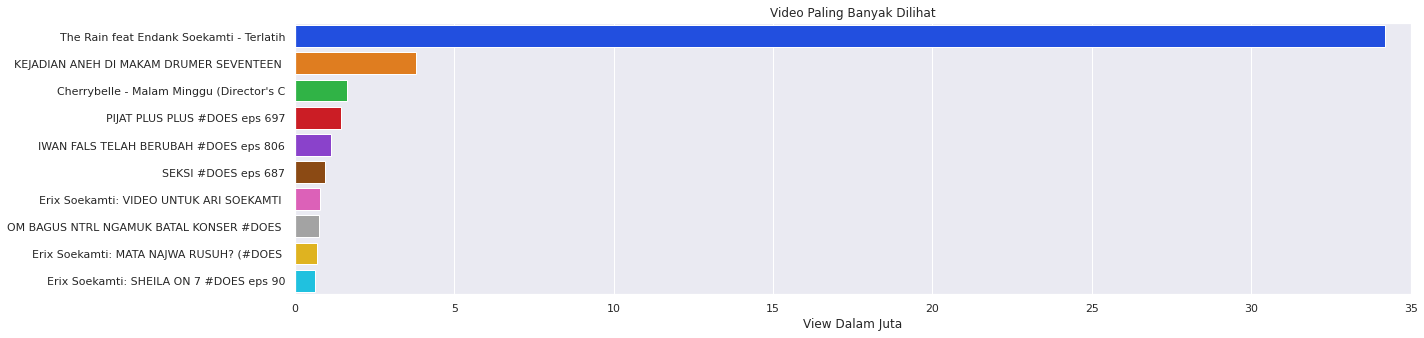

In [82]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(x="view_count_millions", y="title", data=df_highest_views, palette="bright")
plot.set(xlabel='View Dalam Juta', ylabel='')
plot.set_title('Video Paling Banyak Dilihat')
plt.xlim(0, 35)

**Menampilkan Grafik Reaksi Paling Banyak Terhadap Video (Like, Dislike, Comment)**

In [87]:
df_highest_reactions = df.nlargest(10, 'reactions')
df_highest_reactions['title'] = df_highest_reactions['title'].str[:40]
df_highest_reactions['reactions'] = df_highest_reactions['reactions'] / 1
df_highest_reactions

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions
1112,The Rain feat Endank Soekamti - Terlatih,Music Video of The Rain feat Endank Soekamti ‘...,2013-12-04T13:15:59Z,34202358,129713,3439,7785,65,148722.0
260,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN #DOES ...,2018-12-30T18:47:34Z,3801549,34239,2393,1824,53,40280.0
1055,Cherrybelle - Malam Minggu (Director's C,Music Video of Cherrybelle ‘Malam Minggu’.\nSu...,2015-07-20T20:09:30Z,1646040,29190,522,2210,43,34132.0
133,IWAN FALS TELAH BERUBAH #DOES eps 806,Erix Soekamti is a bassist of an Indonesian ro...,2020-03-25T07:40:52Z,1132467,16158,572,1539,37,19808.0
776,Erix Soekamti: VIDEO UNTUK ARI SOEKAMTI,Diary of Erix Soekamti ‘VIDEO UNTUK ARI SOEKAM...,2016-06-23T20:53:57Z,800159,11880,230,2155,56,16420.0
261,AMANAH BANI SEVENTEEN BAND SEBELUM MENIN,SELAMAT JALAN SEVENTEEN BAND SAUDARA KU #DOES...,2018-12-30T18:10:40Z,524030,11022,130,695,58,12542.0
275,THX JRX VS VV #DOES eps 721,THX JRX VS VV #DOES eps 721\n\nSubscribe to Er...,2018-11-16T08:30:49Z,374275,6780,263,1185,27,9413.0
807,Erix Soekamti: MATA NAJWA RUSUH? (#DOES,Diary of Erix Soekamti ‘MATA NAJWA RUSUH? (#DO...,2016-05-14T17:23:18Z,690502,6466,230,1125,49,8946.0
325,30 HARI BERSAMA SUKU IBAN #DOES eps 673,30 HARI BERSAMA SUKU IBAN #DOES (eps 673)\n\nS...,2018-07-15T18:13:46Z,516366,7130,247,440,39,8257.0
170,DERRY SILUMAN MUSIK ITU HARAM #DOES eps,DOES EPS 769\n\nErix Soekamti is a bassist of ...,2019-10-29T05:40:59Z,251358,5679,249,1147,43,8222.0


(0.0, 150000.0)

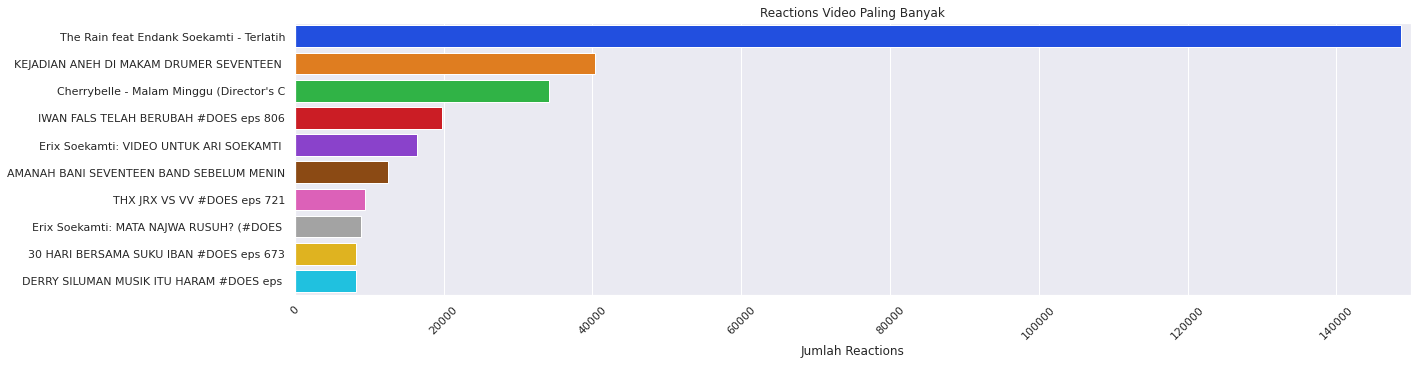

In [89]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="reactions", data=df_highest_reactions, palette="bright")
plot.set(xlabel='Jumlah Reactions', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Reactions Video Paling Banyak')
plt.xlim(0, 150000)

**Menampilkan Grafik Video Yang Paling Banyak Mendapat Dislike**

In [83]:
df_highest_disliked = df.nlargest(10, 'dislike_count')
df_highest_disliked['title'] = df_highest_disliked['title'].str[:40]
df_highest_disliked['dislike_count'] = df_highest_disliked['dislike_count'] / 1
df_highest_disliked

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions
1112,The Rain feat Endank Soekamti - Terlatih,Music Video of The Rain feat Endank Soekamti ‘...,2013-12-04T13:15:59Z,34202358,129713,3439.0,7785,65,148722
260,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN #DOES ...,2018-12-30T18:47:34Z,3801549,34239,2393.0,1824,53,40280
298,PIJAT PLUS PLUS #DOES eps 697,PIJAT PLUS PLUS #DOES (eps 697)\n\nSubscribe t...,2018-09-23T03:13:12Z,1440078,1789,652.0,204,29,2849
133,IWAN FALS TELAH BERUBAH #DOES eps 806,Erix Soekamti is a bassist of an Indonesian ro...,2020-03-25T07:40:52Z,1132467,16158,572.0,1539,37,19808
1055,Cherrybelle - Malam Minggu (Director's C,Music Video of Cherrybelle ‘Malam Minggu’.\nSu...,2015-07-20T20:09:30Z,1646040,29190,522.0,2210,43,34132
308,SEKSI #DOES eps 687,SEKSI #DOES (eps 687)\n\nSubscribe to Erix So...,2018-08-19T03:45:54Z,949521,2096,520.0,167,19,2950
1017,MEDICAL CHECK UP #DOES eps 37,MEDICAL CHECK UP #DOES (eps 37)\n\nSubscribe t...,2015-09-09T19:44:50Z,501934,1595,389.0,264,29,2512
271,OM BAGUS NTRL NGAMUK BATAL KONSER #DOES,OM BAGUS NTRL NGAMUK BATAL KONSER #DOES (eps 7...,2018-11-24T12:27:07Z,761982,5187,379.0,389,47,6344
136,ALHAMDULILLAH #DOES eps 803,DOES 803\nErix Soekamti is a bassist of an Ind...,2020-03-12T01:29:28Z,315120,6080,279.0,753,27,7865
275,THX JRX VS VV #DOES eps 721,THX JRX VS VV #DOES eps 721\n\nSubscribe to Er...,2018-11-16T08:30:49Z,374275,6780,263.0,1185,27,9413


(0.0, 5000.0)

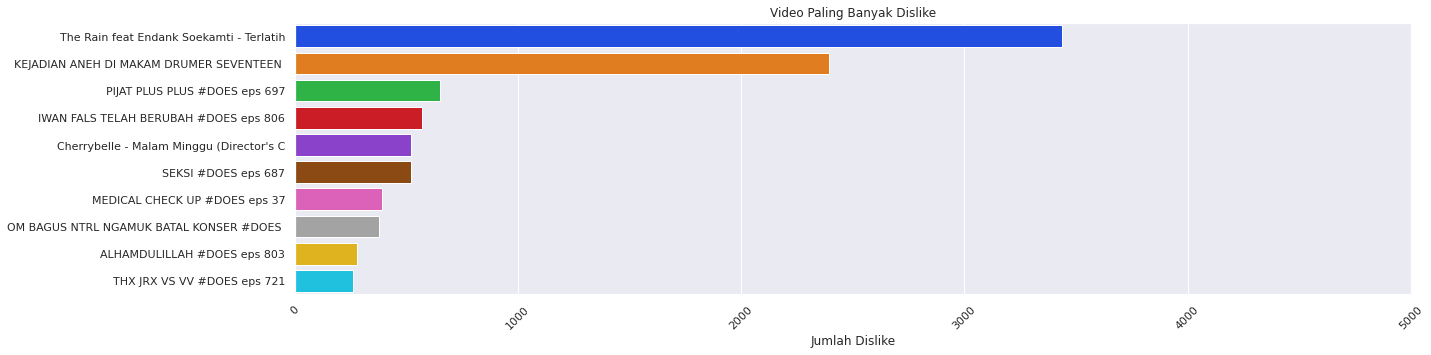

In [84]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="dislike_count", data=df_highest_disliked, palette="bright")
plot.set(xlabel='Jumlah Dislike', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Video Paling Banyak Dislike')
plt.xlim(0, 5000)

**Menampilkan Grafik Video Yang Paling Banyak Mendapatkan Like**

In [85]:
df_highest_liked = df.nlargest(10, 'like_count')
df_highest_liked['title'] = df_highest_liked['title'].str[:40]
df_highest_liked['like_count'] = df_highest_liked['like_count'] / 1
df_highest_liked

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions
1112,The Rain feat Endank Soekamti - Terlatih,Music Video of The Rain feat Endank Soekamti ‘...,2013-12-04T13:15:59Z,34202358,129713.0,3439,7785,65,148722
260,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN #DOES ...,2018-12-30T18:47:34Z,3801549,34239.0,2393,1824,53,40280
1055,Cherrybelle - Malam Minggu (Director's C,Music Video of Cherrybelle ‘Malam Minggu’.\nSu...,2015-07-20T20:09:30Z,1646040,29190.0,522,2210,43,34132
133,IWAN FALS TELAH BERUBAH #DOES eps 806,Erix Soekamti is a bassist of an Indonesian ro...,2020-03-25T07:40:52Z,1132467,16158.0,572,1539,37,19808
776,Erix Soekamti: VIDEO UNTUK ARI SOEKAMTI,Diary of Erix Soekamti ‘VIDEO UNTUK ARI SOEKAM...,2016-06-23T20:53:57Z,800159,11880.0,230,2155,56,16420
261,AMANAH BANI SEVENTEEN BAND SEBELUM MENIN,SELAMAT JALAN SEVENTEEN BAND SAUDARA KU #DOES...,2018-12-30T18:10:40Z,524030,11022.0,130,695,58,12542
325,30 HARI BERSAMA SUKU IBAN #DOES eps 673,30 HARI BERSAMA SUKU IBAN #DOES (eps 673)\n\nS...,2018-07-15T18:13:46Z,516366,7130.0,247,440,39,8257
275,THX JRX VS VV #DOES eps 721,THX JRX VS VV #DOES eps 721\n\nSubscribe to Er...,2018-11-16T08:30:49Z,374275,6780.0,263,1185,27,9413
807,Erix Soekamti: MATA NAJWA RUSUH? (#DOES,Diary of Erix Soekamti ‘MATA NAJWA RUSUH? (#DO...,2016-05-14T17:23:18Z,690502,6466.0,230,1125,49,8946
136,ALHAMDULILLAH #DOES eps 803,DOES 803\nErix Soekamti is a bassist of an Ind...,2020-03-12T01:29:28Z,315120,6080.0,279,753,27,7865


(0.0, 150000.0)

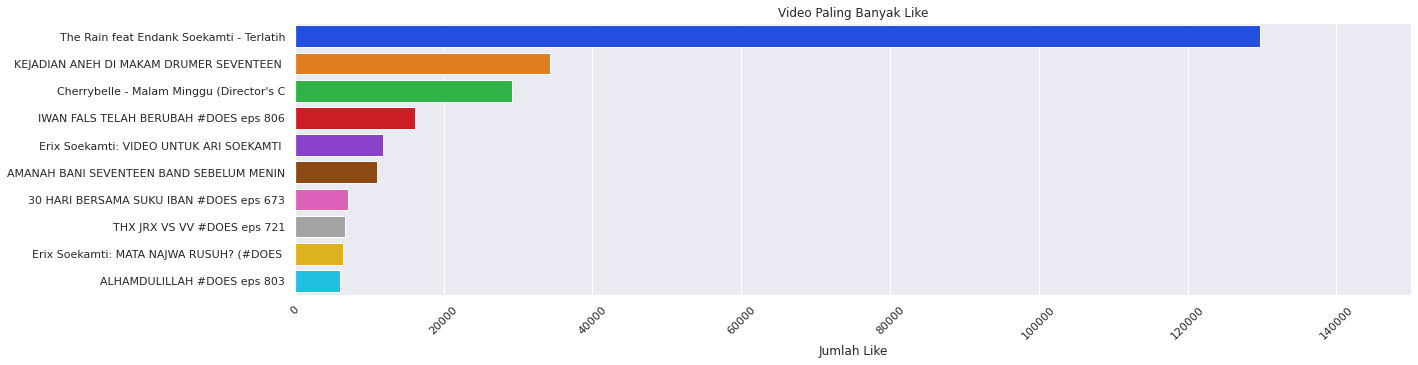

In [86]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="like_count", data=df_highest_liked, palette="bright")
plot.set(xlabel='Jumlah Like', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Video Paling Banyak Like')
plt.xlim(0, 150000)

**Menampilkan Grafik Video Dengan Comment Terbanyak**


In [90]:
df_highest_comment = df.nlargest(10, 'comment_count')
df_highest_comment['title'] = df_highest_comment['title'].str[:40]
df_highest_comment['comment_count'] = df_highest_comment['comment_count'] / 1
df_highest_comment

,title,description,published,view_count,like_count,dislike_count,comment_count,title_length,reactions
1112,The Rain feat Endank Soekamti - Terlatih,Music Video of The Rain feat Endank Soekamti ‘...,2013-12-04T13:15:59Z,34202358,129713,3439,7785.0,65,148722
1055,Cherrybelle - Malam Minggu (Director's C,Music Video of Cherrybelle ‘Malam Minggu’.\nSu...,2015-07-20T20:09:30Z,1646040,29190,522,2210.0,43,34132
776,Erix Soekamti: VIDEO UNTUK ARI SOEKAMTI,Diary of Erix Soekamti ‘VIDEO UNTUK ARI SOEKAM...,2016-06-23T20:53:57Z,800159,11880,230,2155.0,56,16420
260,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN,KEJADIAN ANEH DI MAKAM DRUMER SEVENTEEN #DOES ...,2018-12-30T18:47:34Z,3801549,34239,2393,1824.0,53,40280
133,IWAN FALS TELAH BERUBAH #DOES eps 806,Erix Soekamti is a bassist of an Indonesian ro...,2020-03-25T07:40:52Z,1132467,16158,572,1539.0,37,19808
275,THX JRX VS VV #DOES eps 721,THX JRX VS VV #DOES eps 721\n\nSubscribe to Er...,2018-11-16T08:30:49Z,374275,6780,263,1185.0,27,9413
170,DERRY SILUMAN MUSIK ITU HARAM #DOES eps,DOES EPS 769\n\nErix Soekamti is a bassist of ...,2019-10-29T05:40:59Z,251358,5679,249,1147.0,43,8222
807,Erix Soekamti: MATA NAJWA RUSUH? (#DOES,Diary of Erix Soekamti ‘MATA NAJWA RUSUH? (#DO...,2016-05-14T17:23:18Z,690502,6466,230,1125.0,49,8946
625,LIVING ON BOARD #DOESTHEMOVIE | Erix Soe,Diary of Erix Soekamti ‘LIVING ON BOARD (#DOES...,2017-01-21T16:56:10Z,191252,4742,54,1038.0,45,6872
273,Bukti kasus Angel lelga Vicky prastyo cu,WOW! begini kondisi Angel lelga saat digrebeg ...,2018-11-20T05:31:58Z,71692,1083,172,940.0,51,3135


(0.0, 10000.0)

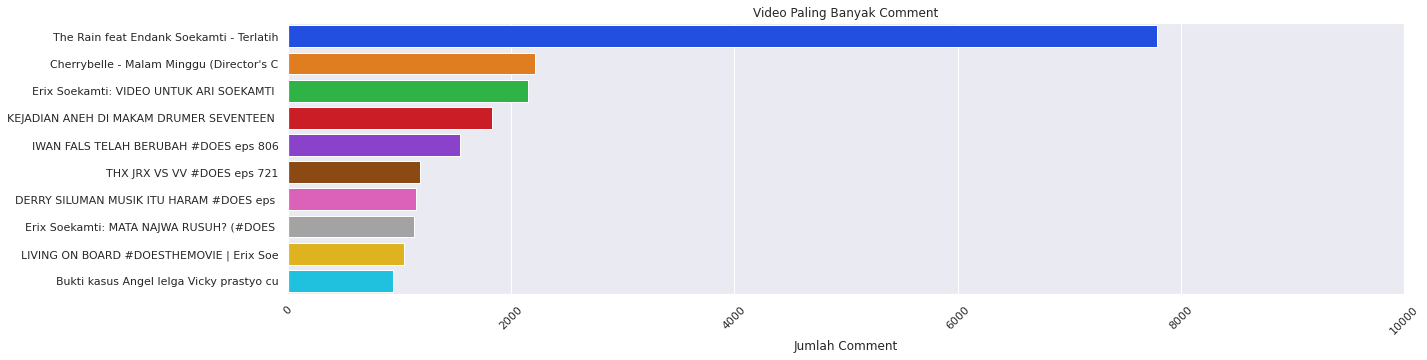

In [92]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.barplot(y="title", x="comment_count", data=df_highest_comment, palette="bright")
plot.set(xlabel='Jumlah Comment', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Video Paling Banyak Comment')
plt.xlim(0, 10000)